<a href="https://colab.research.google.com/github/scaairesearch/da_cv_fer/blob/main/da_cv_fer_sfew_expw_v6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cloning repository
Importing files regarding dataset, model, mains and utils

In [1]:
!git clone https://github.com/scaairesearch/da_cv_fer
import os
os.getcwd()
os.chdir('da_cv_fer')

Cloning into 'da_cv_fer'...
remote: Enumerating objects: 147, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 147 (delta 30), reused 59 (delta 27), pack-reused 81
Receiving objects: 100% (147/147), 6.83 MiB | 19.10 MiB/s, done.
Resolving deltas: 100% (65/65), done.


Installing dependencies

In [2]:
!pip install -q -r requirements.txt # -q is for quiet install
!pip install -q opendatasets # quient install, for some reason this does not get installed with requirements

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.7/301.7 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.7/225.7 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.4/173.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Libraries and Initializations

In [3]:
# Installs from files
from da_cv_fer.data_config import DataConfig
from da_cv_fer.ds_sfew import DatasetSFEW
from da_cv_fer.ds_expw import EXPW
from da_cv_fer.utils import show_batch
from da_cv_fer.model_DANN import DANN
from da_cv_fer.run_config import RunConfig
from da_cv_fer.train import * #(weights_init, train_model,get_correct_predictions,test_model)

import os
import zipfile

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

from tqdm import tqdm # for beautiful model training updates

import matplotlib.pyplot as plt # for plots

import time
from pathlib import Path

from copy import deepcopy
import numpy as np


### Initializing configs

In [4]:
#initializing dataconfig, it tells us about dataset configuration and directory structure
dataconfig = DataConfig()

## SFEW Dataset

Creating dataloader objects.

It copies files from a google drive, unzips it and sets that for use

details: da_cv_fer.ds_sfew.DatasetSFEW

In [5]:
# Mounting Google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
sfew = DatasetSFEW()
sfew_train_loader, sfew_val_loader = sfew.get_dataloader()
print(f' length of SFEW dataset : {len(sfew_train_loader.dataset)}')

 self.BASE_PATH -dataset, 
 self.EXTRACT_DIR-dataset/sfew,
 self.ZIP_FILE_PATH - dataset/SFEW_2.zip 
Directory dataset/sfew created successfully.
No files (including zip file) found in dataset/sfew.Copying file
Starting File copying from /content/gdrive/MyDrive/CV_FER/dataset/SFEW_2.zip to dataset/sfew
File copied successfully from /content/gdrive/MyDrive/CV_FER/dataset/SFEW_2.zip to dataset/sfew
Initiating extraction of dataset/sfew/SFEW_2.zip to dataset/sfew
...completed for dataset/sfew/SFEW_2.zip
dataset/sfew/Train Disgust.zip Disgust
...completed for dataset/sfew/Train/Disgust.zip
dataset/sfew/Train Fear.zip Fear
...completed for dataset/sfew/Train/Fear.zip
dataset/sfew/Train Sad.zip Sad
...completed for dataset/sfew/Train/Sad.zip
dataset/sfew/Train Happy.zip Happy
...completed for dataset/sfew/Train/Happy.zip
dataset/sfew/Train Neutral.zip Neutral
...completed for dataset/sfew/Train/Neutral.zip
dataset/sfew/Train Surprise.zip Surprise
...completed for dataset/sfew/Train/Surprise.

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


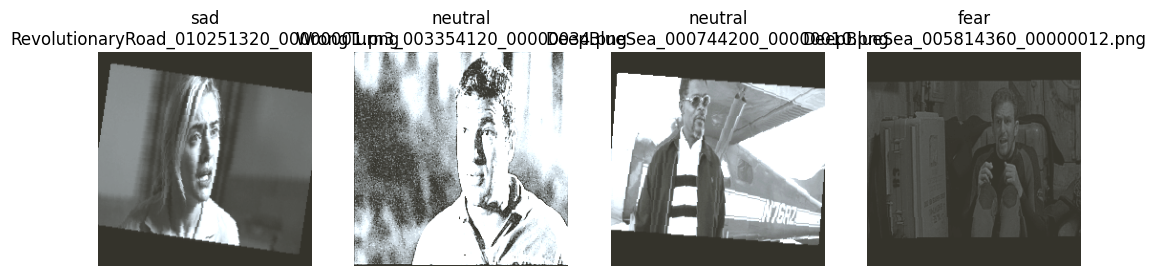

In [7]:
show_batch(sfew_train_loader,sfew.labels,4)

## EXPW Dataset
Creating dataset and dataloader objects.
Split into train and val.

`details: da_cv_fer.ds_expw.EXPW`
<br>
Please be patient, it takes around 3 minutes to download data set

In [8]:
expw_obj = EXPW()
expw_train_ds, expw_val_ds = expw_obj.get_dataset()
expw_train_loader, expw_val_loader = expw_obj.get_dataloader()
print(f' length of EXPW dataset : {len(expw_train_loader.dataset)} , {len(expw_train_ds)}')

desitination file path = dataset/expwds/expwds.zip
in EXPW()...
Directory dataset/expwds created successfully.


100%|██████████| 7.68G/7.68G [01:17<00:00, 106MB/s]



File downloaded successfully from https://www.kaggle.com/datasets/mohammedaaltaha/expwds to dataset/expwds/expwds.zip
Unzipped Files already exist in dataset/expwds, not extracted
Directory dataset/expwds already exists.
Directory dataset/expwds already exists.
 length of EXPW dataset : 54476 , 54476


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


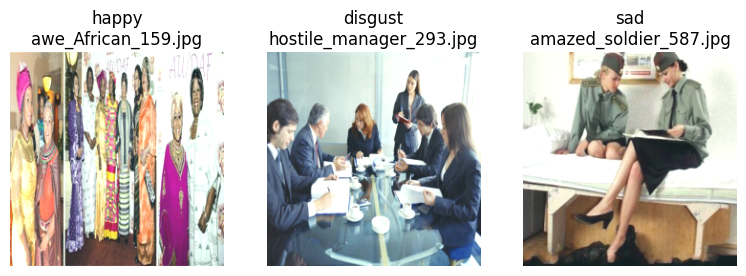

In [9]:
show_batch(expw_train_loader,expw_train_ds.labels,3)

## Creating Dataloaders for source and target

In [10]:
sfew_loader = {'name': 'sfew',
               'train':sfew_train_loader,
               'val':sfew_val_loader
               }

expw_loader = {'name': 'expw',
               'train':expw_train_loader,
               'val':expw_val_loader
               }

data_loader = {'source' : sfew_loader,
               'target' : expw_loader}

source_name = data_loader['source']['name']
target_name = data_loader['target']['name']

## Initializing Model
details are present in `model_DANN`

In [11]:
model = DANN(num_classes=7,backbone='resnet18', dropout=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 118MB/s]


feature extractor backbone created using resnet18 model


In [12]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = model.to(device)

cuda


Running model for single run. checking output shapes

In [13]:
for usage, dict_data_loader in data_loader.items(): ## {'source' : sfew_loader,'target' : expw_loader}
    print('-'*80)
    print(usage)
    for k, v in dict_data_loader.items(): # {'name': 'sfew','train':sfew_train_loader,'val':sfew_val_loader}
      if k == 'name':
        print (f'--------{k} of dataset : {v}--------')
      else:
        print (f'   --------type : {k}--------')
        batch = next(iter(v)) # it may be possible that some datasets have more than 2 outputs, so this strategy is safe
        images, labels = batch[0].to(device), batch[1].to(device)
        print( "Input:\n","Input Image: ",images.shape, ", labels: ",labels.shape)

        x_labels, x_domains, x_features = model(images) # forward pass
        print("Output:\n", "labels: ", x_labels.shape, ", domains: ",x_domains.shape, ", features: ", x_features.shape)


--------------------------------------------------------------------------------
source
--------name of dataset : sfew--------
   --------type : train--------
Input:
 Input Image:  torch.Size([16, 3, 224, 224]) , labels:  torch.Size([16, 7])
Output:
 labels:  torch.Size([16, 7]) , domains:  torch.Size([16, 2]) , features:  torch.Size([16, 1000])
   --------type : val--------
Input:
 Input Image:  torch.Size([16, 3, 224, 224]) , labels:  torch.Size([16, 7])
Output:
 labels:  torch.Size([16, 7]) , domains:  torch.Size([16, 2]) , features:  torch.Size([16, 1000])
--------------------------------------------------------------------------------
target
--------name of dataset : expw--------
   --------type : train--------
Input:
 Input Image:  torch.Size([16, 3, 224, 224]) , labels:  torch.Size([16, 7])
Output:
 labels:  torch.Size([16, 7]) , domains:  torch.Size([16, 2]) , features:  torch.Size([16, 1000])
   --------type : val--------
Input:
 Input Image:  torch.Size([16, 3, 224, 224]) , l

In [14]:
# #@title Weight Initialization

# # initializating weights using xavier normal
# def weights_init(m):
#     if isinstance(m, nn.Conv2d):
#       nn.init.xavier_normal_(m.weight)
#     elif isinstance(m, nn.Linear):
#       nn.init.xavier_normal_(m.weight)
#       nn.init.zeros_(m.bias)

# # initializating weights using xavier normal
# def weights_init(m):
#     if isinstance(m, nn.Conv2d):
#       # nn.init.xavier_normal_(m.weight)
#       pass # not initialising Conv layers as they are pretrained
#     elif isinstance(m, nn.Linear):
#       nn.init.xavier_normal_(m.weight) # Linear layers are added on
#       nn.init.zeros_(m.bias)

## Non DANN: Training, Validating, Saving

### Scheduler - ReduceLRonPlateau

In [15]:

# from torch.optim.lr_scheduler import ReduceLROnPlateau


# class EarlyStopping:
#     def __init__(self, patience=5, verbose=False):
#         self.patience = patience
#         self.verbose = verbose
#         self.counter = 0
#         self.best_metric = float('inf')  # Adjust based on your metric (e.g., validation loss)
#         self.early_stop = False

#     def __call__(self, metric):
#         if metric < self.best_metric:
#             self.best_metric = metric
#             self.counter = 0
#         else:
#             self.counter += 1
#             if self.counter >= self.patience:
#                 self.early_stop = True
#         return self.early_stop

# class CustomModel(nn.Module):
#     # Define your model architecture here

# # Assuming you have a DataLoader for your dataset
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)

# # Instantiate your model
# model = CustomModel()

# # Set up your loss function and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# # Set up the ReduceLROnPlateau scheduler
# scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.2, patience=3, min_lr=1e-6)

# # Set up EarlyStopping callback
# early_stopping = EarlyStopping(patience=5, verbose=True)



#     # Adjust learning rate based on validation loss
#     scheduler.step(val_loss)

#     # Check for early stopping
#     if early_stopping(val_loss):
#         print("Early stopping")
#         break

# # Save or use the trained model



In [16]:
def early_stopping_difference(list_loss: list, patience = 5, difference = 0.0003):
  if len(list_loss) > patience:
    reverse_list_loss = list_loss[::-1]
    reverse_list_loss = reverse_list_loss[0:patience+1]
    for index in range(0,len(reverse_list_loss)-1):
      if abs(reverse_list_loss[index] - reverse_list_loss[index+1]) > difference:
        return False
    return True
  else:
    return False

Configuration towards execution

In [17]:
runconfig = RunConfig()
device = runconfig.device

non_dann_model = DANN(num_classes=7, backbone = 'resnet18')
non_dann_model = non_dann_model.to(device)
# non_dann_model.apply(weights_init) # initializing model, only linear layers

#learning rate
lr = float(runconfig.inital_lr)

# Epochs
EPOCHS = runconfig.NUM_EPOCHS
print("EPOCHS", EPOCHS)

# ReduceLRonPlateau Scheduler Params
scheduler_patience = runconfig.scheduler_patience
scheduler_factor = runconfig.scheduler_factor
scheduler_threshold = runconfig.scheduler_threshold

# Early stopping params
early_stop_patience = runconfig.early_stop_patience
early_stop_difference = runconfig.early_stop_difference

# optimizer
optimizer = optim.SGD(non_dann_model.parameters(), lr = lr, momentum = 0.9)

# Set up the ReduceLROnPlateau scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min',
                              factor=scheduler_factor,
                              patience=scheduler_patience,
                              threshold = scheduler_threshold,
                              min_lr=1e-6,
                              verbose= True)

# loss functions
criterion_class = (runconfig.criterion_class).to(device=device)
criterion_domain = (runconfig.criterion_domain).to(device=device)

# loss accumulation
train_losses = [] # to capture train losses over training epochs
val_losses = [] # to capture validation loss over epochs
lr_schedule = [] # to capture learning rate over epochs
epoch_converge = 0 #TODO: run config based

feature extractor backbone created using resnet18 model
EPOCHS 50


In [18]:
# Training block
print('------ Training started for Non DANN Model ---- ')
print(f'starting LR : {lr}')
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1, " of ", EPOCHS)

    #Train Model
    avg_epoch_loss, curr_lr = train_model(model = non_dann_model,
                                          device = device,
                                          data_loader = data_loader['source']['train'],
                                          optimizer = optimizer,
                                          epoch = epoch,
                                          class_loss_function = criterion_class)
    train_losses.append(avg_epoch_loss)
    lr_schedule.append(curr_lr)

    #Adding Scheduler #TODO: ADD SCHEDULER
    scheduler.step(avg_epoch_loss) #applying scheduler on training loss

    #Validate Model
    correct, avg_epoch_val_loss = test_model(model= non_dann_model,
                                    device= device,
                                    data_loader = data_loader['source']['val'],
                                    class_loss_function = criterion_class
                                    )

    val_losses.append(avg_epoch_val_loss)

    if early_stopping_difference(val_losses,
                                 patience = early_stop_patience,
                                 difference= early_stop_difference):
      print (f'-------Early Stopping at epoch {epoch+1}---')
      epoch_converge = epoch+1
      break

correct, test_loss_source = test_model(model= non_dann_model,
                                    device= device,
                                    data_loader = data_loader['source']['val'], # source val loader
                                    class_loss_function = criterion_class)

correct, test_loss_target = test_model(model= non_dann_model,
                                    device= device,
                                    data_loader = data_loader['target']['val'], # target val loader
                                    class_loss_function = criterion_class)

dict_non_dann_losses = {'train_losses' : train_losses,
                                       'val_losses': val_losses,
                                       'test_loss_source' : test_loss_source,
                                       'test_loss_target' : test_loss_target,
                                       'epoch_convergence' : epoch_converge,
                                       'lr': lr_schedule}




------ Training started for Non DANN Model ---- 
starting LR : 0.001
EPOCH: 1  of  50
epoch = 1...in training function


Loss=1.9773306846618652 Accuracy=169/958(17.64%) Epoch Avg loss=0.12367739 LR=0.001000: 100%|██████████| 60/60 [00:17<00:00,  3.34it/s]


Test / Val: Average loss: 0.1238, Accuracy: 77/436 (17.66%)

EPOCH: 2  of  50
epoch = 2...in training function


Loss=1.756173849105835 Accuracy=243/958(25.37%) Epoch Avg loss=0.11703051 LR=0.001000: 100%|██████████| 60/60 [00:17<00:00,  3.50it/s]


Test / Val: Average loss: 0.1249, Accuracy: 74/436 (16.97%)

EPOCH: 3  of  50
epoch = 3...in training function


Loss=1.755847692489624 Accuracy=240/958(25.05%) Epoch Avg loss=0.11460041 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.81it/s]


Test / Val: Average loss: 0.1265, Accuracy: 81/436 (18.58%)

EPOCH: 4  of  50
epoch = 4...in training function


Loss=1.5605385303497314 Accuracy=289/958(30.17%) Epoch Avg loss=0.11108287 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.83it/s]


Test / Val: Average loss: 0.1266, Accuracy: 75/436 (17.20%)

EPOCH: 5  of  50
epoch = 5...in training function


Loss=1.7069402933120728 Accuracy=325/958(33.92%) Epoch Avg loss=0.10854342 LR=0.001000: 100%|██████████| 60/60 [00:16<00:00,  3.68it/s]


Test / Val: Average loss: 0.1263, Accuracy: 72/436 (16.51%)

EPOCH: 6  of  50
epoch = 6...in training function


Loss=1.5616494417190552 Accuracy=321/958(33.51%) Epoch Avg loss=0.10673640 LR=0.001000: 100%|██████████| 60/60 [00:17<00:00,  3.46it/s]


Test / Val: Average loss: 0.1281, Accuracy: 76/436 (17.43%)

EPOCH: 7  of  50
epoch = 7...in training function


Loss=1.77035653591156 Accuracy=398/958(41.54%) Epoch Avg loss=0.09966809 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.84it/s]


Test / Val: Average loss: 0.1268, Accuracy: 83/436 (19.04%)

EPOCH: 8  of  50
epoch = 8...in training function


Loss=1.592302680015564 Accuracy=373/958(38.94%) Epoch Avg loss=0.09802385 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.78it/s]


Test / Val: Average loss: 0.1307, Accuracy: 92/436 (21.10%)

EPOCH: 9  of  50
epoch = 9...in training function


Loss=1.3555347919464111 Accuracy=420/958(43.84%) Epoch Avg loss=0.09348278 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.79it/s]


Test / Val: Average loss: 0.1312, Accuracy: 87/436 (19.95%)

EPOCH: 10  of  50
epoch = 10...in training function


Loss=1.3706414699554443 Accuracy=464/958(48.43%) Epoch Avg loss=0.08844890 LR=0.001000: 100%|██████████| 60/60 [00:18<00:00,  3.33it/s]


Test / Val: Average loss: 0.1298, Accuracy: 108/436 (24.77%)

EPOCH: 11  of  50
epoch = 11...in training function


Loss=1.3529560565948486 Accuracy=490/958(51.15%) Epoch Avg loss=0.08510490 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.78it/s]


Test / Val: Average loss: 0.1284, Accuracy: 106/436 (24.31%)

EPOCH: 12  of  50
epoch = 12...in training function


Loss=1.6291028261184692 Accuracy=545/958(56.89%) Epoch Avg loss=0.07838948 LR=0.001000: 100%|██████████| 60/60 [00:16<00:00,  3.72it/s]


Test / Val: Average loss: 0.1290, Accuracy: 106/436 (24.31%)

EPOCH: 13  of  50
epoch = 13...in training function


Loss=1.4346002340316772 Accuracy=561/958(58.56%) Epoch Avg loss=0.07347539 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.80it/s]


Test / Val: Average loss: 0.1270, Accuracy: 112/436 (25.69%)

EPOCH: 14  of  50
epoch = 14...in training function


Loss=1.1961370706558228 Accuracy=609/958(63.57%) Epoch Avg loss=0.06679371 LR=0.001000: 100%|██████████| 60/60 [00:17<00:00,  3.52it/s]


Test / Val: Average loss: 0.1279, Accuracy: 120/436 (27.52%)

EPOCH: 15  of  50
epoch = 15...in training function


Loss=0.8115188479423523 Accuracy=631/958(65.87%) Epoch Avg loss=0.06402054 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.79it/s]


Test / Val: Average loss: 0.1313, Accuracy: 113/436 (25.92%)

EPOCH: 16  of  50
epoch = 16...in training function


Loss=0.9997978210449219 Accuracy=650/958(67.85%) Epoch Avg loss=0.05967293 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.82it/s]


Test / Val: Average loss: 0.1332, Accuracy: 115/436 (26.38%)

EPOCH: 17  of  50
epoch = 17...in training function


Loss=0.8849170207977295 Accuracy=699/958(72.96%) Epoch Avg loss=0.05255291 LR=0.001000: 100%|██████████| 60/60 [00:16<00:00,  3.57it/s]


Test / Val: Average loss: 0.1445, Accuracy: 101/436 (23.17%)

EPOCH: 18  of  50
epoch = 18...in training function


Loss=0.7655882239341736 Accuracy=708/958(73.90%) Epoch Avg loss=0.04951763 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.83it/s]


Test / Val: Average loss: 0.1435, Accuracy: 100/436 (22.94%)

EPOCH: 19  of  50
epoch = 19...in training function


Loss=0.6139264106750488 Accuracy=728/958(75.99%) Epoch Avg loss=0.04610424 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.86it/s]


Test / Val: Average loss: 0.1420, Accuracy: 95/436 (21.79%)

EPOCH: 20  of  50
epoch = 20...in training function


Loss=1.0322439670562744 Accuracy=740/958(77.24%) Epoch Avg loss=0.04402335 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.84it/s]


Test / Val: Average loss: 0.1458, Accuracy: 96/436 (22.02%)

EPOCH: 21  of  50
epoch = 21...in training function


Loss=0.7701781392097473 Accuracy=754/958(78.71%) Epoch Avg loss=0.04007458 LR=0.001000: 100%|██████████| 60/60 [00:17<00:00,  3.37it/s]


Test / Val: Average loss: 0.1427, Accuracy: 97/436 (22.25%)

EPOCH: 22  of  50
epoch = 22...in training function


Loss=0.5468388199806213 Accuracy=786/958(82.05%) Epoch Avg loss=0.03811334 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.84it/s]


Test / Val: Average loss: 0.1477, Accuracy: 113/436 (25.92%)

EPOCH: 23  of  50
epoch = 23...in training function


Loss=0.9294189214706421 Accuracy=777/958(81.11%) Epoch Avg loss=0.03644142 LR=0.001000: 100%|██████████| 60/60 [00:16<00:00,  3.71it/s]


Test / Val: Average loss: 0.1436, Accuracy: 119/436 (27.29%)

EPOCH: 24  of  50
epoch = 24...in training function


Loss=0.35772207379341125 Accuracy=812/958(84.76%) Epoch Avg loss=0.03093484 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.78it/s]


Test / Val: Average loss: 0.1431, Accuracy: 119/436 (27.29%)

EPOCH: 25  of  50
epoch = 25...in training function


Loss=0.4069207012653351 Accuracy=829/958(86.53%) Epoch Avg loss=0.02810899 LR=0.001000: 100%|██████████| 60/60 [00:17<00:00,  3.40it/s]


Test / Val: Average loss: 0.1397, Accuracy: 118/436 (27.06%)

EPOCH: 26  of  50
epoch = 26...in training function


Loss=0.6456669569015503 Accuracy=823/958(85.91%) Epoch Avg loss=0.02825384 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.76it/s]


Test / Val: Average loss: 0.1464, Accuracy: 108/436 (24.77%)

EPOCH: 27  of  50
epoch = 27...in training function


Loss=0.6457960605621338 Accuracy=806/958(84.13%) Epoch Avg loss=0.02940914 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.86it/s]


Test / Val: Average loss: 0.1483, Accuracy: 107/436 (24.54%)

EPOCH: 28  of  50
epoch = 28...in training function


Loss=0.3737432062625885 Accuracy=833/958(86.95%) Epoch Avg loss=0.02566570 LR=0.001000: 100%|██████████| 60/60 [00:16<00:00,  3.71it/s]


Test / Val: Average loss: 0.1543, Accuracy: 119/436 (27.29%)

EPOCH: 29  of  50
epoch = 29...in training function


Loss=0.6059553027153015 Accuracy=845/958(88.20%) Epoch Avg loss=0.02378734 LR=0.001000: 100%|██████████| 60/60 [00:17<00:00,  3.39it/s]


Test / Val: Average loss: 0.1522, Accuracy: 120/436 (27.52%)

EPOCH: 30  of  50
epoch = 30...in training function


Loss=0.6262072324752808 Accuracy=828/958(86.43%) Epoch Avg loss=0.02534899 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.83it/s]


Test / Val: Average loss: 0.1546, Accuracy: 110/436 (25.23%)

EPOCH: 31  of  50
epoch = 31...in training function


Loss=0.2632499635219574 Accuracy=848/958(88.52%) Epoch Avg loss=0.02301743 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.78it/s]


Test / Val: Average loss: 0.1558, Accuracy: 111/436 (25.46%)

EPOCH: 32  of  50
epoch = 32...in training function


Loss=0.41943272948265076 Accuracy=855/958(89.25%) Epoch Avg loss=0.02118840 LR=0.001000: 100%|██████████| 60/60 [00:16<00:00,  3.74it/s]


Test / Val: Average loss: 0.1600, Accuracy: 118/436 (27.06%)

EPOCH: 33  of  50
epoch = 33...in training function


Loss=0.7372649908065796 Accuracy=849/958(88.62%) Epoch Avg loss=0.02067727 LR=0.001000: 100%|██████████| 60/60 [00:18<00:00,  3.25it/s]


Test / Val: Average loss: 0.1618, Accuracy: 130/436 (29.82%)

EPOCH: 34  of  50
epoch = 34...in training function


Loss=0.21488793194293976 Accuracy=871/958(90.92%) Epoch Avg loss=0.02004569 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.77it/s]


Test / Val: Average loss: 0.1669, Accuracy: 100/436 (22.94%)

EPOCH: 35  of  50
epoch = 35...in training function


Loss=0.15038220584392548 Accuracy=888/958(92.69%) Epoch Avg loss=0.01806180 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.76it/s]


Test / Val: Average loss: 0.1691, Accuracy: 113/436 (25.92%)

EPOCH: 36  of  50
epoch = 36...in training function


Loss=0.17050807178020477 Accuracy=877/958(91.54%) Epoch Avg loss=0.01708041 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.76it/s]


Test / Val: Average loss: 0.1664, Accuracy: 115/436 (26.38%)

EPOCH: 37  of  50
epoch = 37...in training function


Loss=0.10593383759260178 Accuracy=881/958(91.96%) Epoch Avg loss=0.01654927 LR=0.001000: 100%|██████████| 60/60 [00:17<00:00,  3.41it/s]


Test / Val: Average loss: 0.1616, Accuracy: 107/436 (24.54%)

EPOCH: 38  of  50
epoch = 38...in training function


Loss=0.26286250352859497 Accuracy=887/958(92.59%) Epoch Avg loss=0.01500594 LR=0.001000: 100%|██████████| 60/60 [00:16<00:00,  3.73it/s]


Test / Val: Average loss: 0.1641, Accuracy: 107/436 (24.54%)

EPOCH: 39  of  50
epoch = 39...in training function


Loss=0.07722984254360199 Accuracy=880/958(91.86%) Epoch Avg loss=0.01677229 LR=0.001000: 100%|██████████| 60/60 [00:16<00:00,  3.73it/s]


Test / Val: Average loss: 0.1674, Accuracy: 99/436 (22.71%)

EPOCH: 40  of  50
epoch = 40...in training function


Loss=0.1797902137041092 Accuracy=894/958(93.32%) Epoch Avg loss=0.01555981 LR=0.001000: 100%|██████████| 60/60 [00:16<00:00,  3.53it/s]


Test / Val: Average loss: 0.1781, Accuracy: 110/436 (25.23%)

EPOCH: 41  of  50
epoch = 41...in training function


Loss=0.1067093163728714 Accuracy=879/958(91.75%) Epoch Avg loss=0.01539304 LR=0.001000: 100%|██████████| 60/60 [00:16<00:00,  3.65it/s]


Test / Val: Average loss: 0.1714, Accuracy: 105/436 (24.08%)

EPOCH: 42  of  50
epoch = 42...in training function


Loss=0.09010764956474304 Accuracy=883/958(92.17%) Epoch Avg loss=0.01467122 LR=0.001000: 100%|██████████| 60/60 [00:16<00:00,  3.74it/s]


Test / Val: Average loss: 0.1719, Accuracy: 100/436 (22.94%)

EPOCH: 43  of  50
epoch = 43...in training function


Loss=0.20153190195560455 Accuracy=883/958(92.17%) Epoch Avg loss=0.01474599 LR=0.001000: 100%|██████████| 60/60 [00:16<00:00,  3.73it/s]


Test / Val: Average loss: 0.1707, Accuracy: 105/436 (24.08%)

EPOCH: 44  of  50
epoch = 44...in training function


Loss=0.10916664451360703 Accuracy=894/958(93.32%) Epoch Avg loss=0.01380224 LR=0.001000: 100%|██████████| 60/60 [00:17<00:00,  3.41it/s]


Test / Val: Average loss: 0.1705, Accuracy: 103/436 (23.62%)

EPOCH: 45  of  50
epoch = 45...in training function


Loss=0.22759516537189484 Accuracy=889/958(92.80%) Epoch Avg loss=0.01320807 LR=0.001000: 100%|██████████| 60/60 [00:16<00:00,  3.65it/s]


Test / Val: Average loss: 0.1707, Accuracy: 104/436 (23.85%)

EPOCH: 46  of  50
epoch = 46...in training function


Loss=0.40044674277305603 Accuracy=892/958(93.11%) Epoch Avg loss=0.01325155 LR=0.001000: 100%|██████████| 60/60 [00:16<00:00,  3.74it/s]


Test / Val: Average loss: 0.1730, Accuracy: 106/436 (24.31%)

EPOCH: 47  of  50
epoch = 47...in training function


Loss=0.13004128634929657 Accuracy=904/958(94.36%) Epoch Avg loss=0.01044907 LR=0.001000: 100%|██████████| 60/60 [00:15<00:00,  3.77it/s]


Test / Val: Average loss: 0.1712, Accuracy: 103/436 (23.62%)

EPOCH: 48  of  50
epoch = 48...in training function


Loss=0.17902769148349762 Accuracy=902/958(94.15%) Epoch Avg loss=0.01213277 LR=0.001000: 100%|██████████| 60/60 [00:18<00:00,  3.28it/s]


Test / Val: Average loss: 0.1648, Accuracy: 115/436 (26.38%)

EPOCH: 49  of  50
epoch = 49...in training function


Loss=0.09476535022258759 Accuracy=899/958(93.84%) Epoch Avg loss=0.01296957 LR=0.001000: 100%|██████████| 60/60 [00:16<00:00,  3.64it/s]


Test / Val: Average loss: 0.1701, Accuracy: 104/436 (23.85%)

EPOCH: 50  of  50
epoch = 50...in training function


Loss=0.06788823008537292 Accuracy=898/958(93.74%) Epoch Avg loss=0.01297001 LR=0.001000: 100%|██████████| 60/60 [00:16<00:00,  3.68it/s]


Test / Val: Average loss: 0.1680, Accuracy: 109/436 (25.00%)

Test / Val: Average loss: 0.1693, Accuracy: 109/436 (25.00%)

Test / Val: Average loss: 0.1836, Accuracy: 2738/13620 (20.10%)



In [19]:
print(dict_non_dann_losses)

{'train_losses': [0.12367739, 0.11703051, 0.11460041, 0.11108287, 0.10854342, 0.1067364, 0.09966809, 0.09802385, 0.09348278, 0.0884489, 0.0851049, 0.07838948, 0.07347539, 0.06679371, 0.06402054, 0.05967293, 0.05255291, 0.04951763, 0.04610424, 0.04402335, 0.04007458, 0.03811334, 0.03644142, 0.03093484, 0.02810899, 0.02825384, 0.02940914, 0.0256657, 0.02378734, 0.02534899, 0.02301743, 0.0211884, 0.02067727, 0.02004569, 0.0180618, 0.01708041, 0.01654927, 0.01500594, 0.01677229, 0.01555981, 0.01539304, 0.01467122, 0.01474599, 0.01380224, 0.01320807, 0.01325155, 0.01044907, 0.01213277, 0.01296957, 0.01297001], 'val_losses': [0.12381553677243924, 0.12485625082199726, 0.1265336597731354, 0.12655095414284173, 0.1263160842274307, 0.12807372130385233, 0.12681430906330773, 0.13066072748341692, 0.13119239736040797, 0.12980511292405084, 0.128421776065039, 0.12902913481817332, 0.12700981530574484, 0.127942198733671, 0.1312863979864558, 0.13320210412007952, 0.1444552592728116, 0.14354779222689637, 0.

In [24]:
#@title Plotting Training and Validation Loss Function
def plot_loss_curves(dict_losses, mode = "train_losses"):
    fig=plt.figure(figsize=(10,20))
    fig.add_subplot(5, 1, 2)
    # for embedding in dict_emb_file.keys():
    list1_to_plot= dict_losses[mode]
    plt.plot(range(1,len(list1_to_plot)+1),list1_to_plot, label = 'Non DANN ' + 'SFEW')
    plt.xlabel('number of epochs', fontsize=10)
    plt.ylabel(str(mode), fontsize=10)
    plt.legend(loc = 'upper right')
    plt.title(" "+mode)
    plt.show()

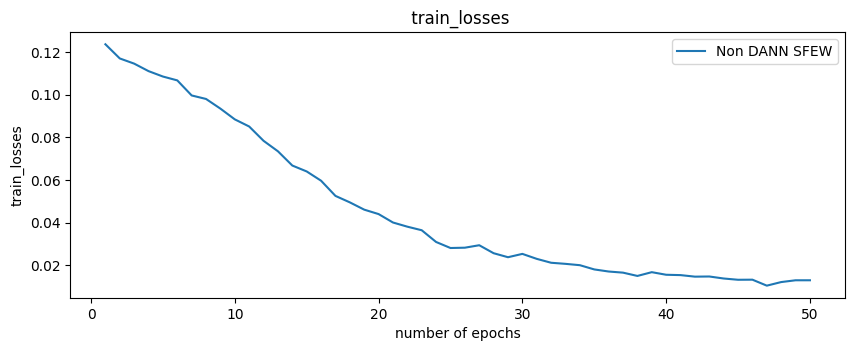

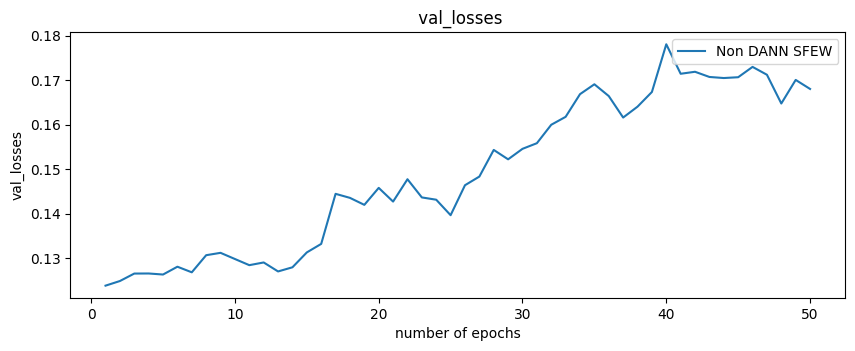

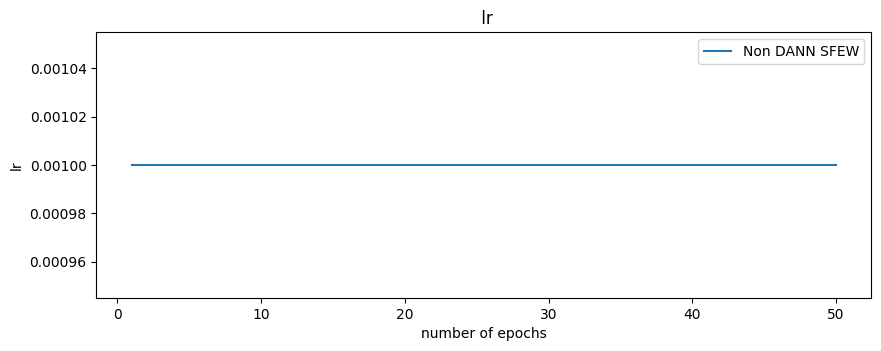

In [21]:
plot_loss_curves(dict_non_dann_losses,mode='train_losses')
plot_loss_curves(dict_non_dann_losses,mode='val_losses')
plot_loss_curves(dict_non_dann_losses,mode='lr')

### Saving NON DANN Model

In [22]:
MODEL_DIR = dataconfig.MODEL_DIR
NON_DANN_SFEW_DIR = dataconfig.NON_DANN_SFEW_DIR
SPECIFIC_MODEL_DIR = Path(os.path.join(MODEL_DIR, f'non_dann_{source_name}_{target_name}'))
print(MODEL_DIR, NON_DANN_SFEW_DIR, SPECIFIC_MODEL_DIR)

/content/gdrive/MyDrive/CV_FER/models /content/gdrive/MyDrive/CV_FER/models/non_dann_sfew /content/gdrive/MyDrive/CV_FER/models/non_dann_sfew_expw


In [23]:
model_name = f'non_dann_{source_name}_{target_name}_{str(time.strftime("%d_%m"))}.pt' #"non_dann_sfew_" +str(time.strftime("%d_%m"))+ ".pt"
# dataconfig = DataConfig()
# NON_DANN_SFEW_DIR = dataconfig.NON_DANN_SFEW_DIR
if not SPECIFIC_MODEL_DIR.exists():
    # Create the directory
    SPECIFIC_MODEL_DIR.mkdir(parents=True, exist_ok=True)
    print(f'Directory {SPECIFIC_MODEL_DIR} created successfully.')
else:
    print(f'Directory {SPECIFIC_MODEL_DIR} already exists.')

torch.save(non_dann_model.state_dict(), Path(SPECIFIC_MODEL_DIR,model_name))

Directory /content/gdrive/MyDrive/CV_FER/models/non_dann_sfew_expw already exists.


In [24]:
# #@title Plotting Training and Validation Loss Function
# def plot_loss_curves(dict_non_dann_losses_list, mode = "train_losses"):
#     fig=plt.figure(figsize=(10,20))
#     fig.add_subplot(5, 1, 2)
#     # for embedding in dict_emb_file.keys():
#     list1_to_plot= dict_non_dann_losses_list[mode]
#     plt.plot(range(1,len(list1_to_plot)+1),list1_to_plot, label = 'Non DANN ' + 'SFEW')
#     plt.xlabel('number of epochs', fontsize=10)
#     plt.ylabel(str(mode), fontsize=10)
#     plt.legend(loc = 'upper right')
#     plt.title(" "+mode)
#     plt.show()

In [25]:
# plot_loss_curves(dict_non_dann_losses_list,mode='train_losses')
# plot_loss_curves(dict_non_dann_losses_list,mode='val_losses')
# plot_loss_curves(dict_non_dann_losses_list,mode='lr')

In [26]:
# model_name = model_name #"non_dann_sfew_19_12.pt"

## Loading NON DANN Model for DANN and DANN EWC


In [13]:
model_name = f'non_dann_{source_name}_{target_name}_{str(time.strftime("%d_%m"))}.pt' # Typical - non_dann_sfew_expw_30_01.pt This may change, use specific model name if required4
model_name

'non_dann_sfew_expw_31_01.pt'

In [14]:
# from data_config import DataConfig
dataconfig_1 = DataConfig()
MODEL_DIR = dataconfig_1.MODEL_DIR

MODEL_PATH = Path(os.path.join(MODEL_DIR, f'non_dann_{source_name}_{target_name}', model_name))

loaded_model_non_dann = DANN(num_classes=7, backbone = 'resnet18') # skeleton copy
loaded_model_non_dann.load_state_dict(torch.load(MODEL_PATH,map_location=torch.device(device)))

# loaded_model_non_dann.load_state_dict(torch.load(Path(NON_DANN_SFEW_DIR, model_name),map_location=torch.device(device)))
model_dann = loaded_model_non_dann # saves training time - check with all
model_dann_ewc = loaded_model_non_dann # saves training time - check with all

# print(model_dann)

feature extractor backbone created using resnet18 model


In [29]:
# #checking if the models are same weights, i.e. copy has worked fine
# for p1, p2 in zip(non_dann_model.parameters(), model_dann.parameters()):
#     if p1.data.ne(p2.data).sum() > 0:
#         print ('False')
# print ('True')

## DANN Execution :  Training, Validating, Saving


In [30]:

def execute_dann(model,device,
                     source_train_loader, source_val_loader,
                     target_train_loader, target_val_loader,
                     optimizer,
                     n_epochs, # total number of epochs (different from individual epoch)
                     class_loss_function = nn.CrossEntropyLoss(),
                     domain_loss_function = nn.BCEWithLogitsLoss() ):

    train_losses = [] # to capture train losses over training epochs
    val_losses = [] # to capture validation loss over epochs
    epoch_converge = epoch
    max_batches = min(len(source_train_loader), len(target_train_loader)) # Trying to check which is having less batches.
    model = model.to(device)
    # model.apply(weights_init) # TODO: skipping weights update - we can experimentation later on, and see if this helps
    list_alpha =[]


    for epoch_idx in range(n_epochs):
        print(f'epoch = {epoch_idx+1}...in DANN execution function')
        source_iterator = iter(source_train_loader)
        target_iterator = iter (target_train_loader)
        epoch_task_loss = 0
        epoch_domain_loss =  0
        epoch_total_loss = 0
        processed = 0

        for batch_idx in range(max_batches-1):
            p = float(batch_idx + epoch_idx * max_batches) / (n_epochs * max_batches)
            alpha = 2. / (1. + np.exp(-10 * p)) - 1
            list_alpha.append(alpha)
            alpha = torch.tensor(alpha)

            model.train() # everytime ?
            optimizer.zero_grad() # flushing out the accumulated gradients

            #---------------------Source Dataset Training ------------------------#
            source_batch = next(source_iterator)
            source_images, source_labels = source_batch[0].to(device), source_batch[1].to(device) # getting images and labels, on device
            source_class_outputs, source_domain_outputs, _ = model(source_images, alpha=alpha) # forward pass, output = {class, domain, feature}


            loss_source_class = class_loss_function(source_class_outputs, source_labels) # calculating class loss

            source_domain_inputs = torch.tensor([1., 0.]*len(source_batch[0])).view(-1,2).to(device) # Source Image == [1., 0.]

            loss_source_domain = domain_loss_function(source_domain_outputs, source_domain_inputs) # calculating domain loss

            processed += len(source_batch[0])

            #---------------------Target Dataset Training ------------------------#
            target_batch = next (target_iterator)
            target_images = target_batch[0].to(device) # getting images, on device. There are no labels for target
            _, target_domain_outputs, _ = model(target_images, alpha=alpha) # forward pass, output = {class, domain, feature}

            target_domain_inputs = torch.tensor([0., 1.]*len(source_batch[0])).view(-1,2).to(device)  # Target Image == [0., 1.]
            # print(f' target domain input shape {target_domain_inputs.shape}, output shape {target_domain_outputs.shape}')

            loss_target_domain = domain_loss_function(target_domain_outputs,target_domain_inputs)  # calculating domain loss


            #---------------------Combining Loss ------------------------#
            total_loss = loss_source_class + loss_source_domain + loss_target_domain
            total_loss.backward() #backpropogation, creating gradients
            optimizer.step() # updating the params

            epoch_task_loss += loss_source_class.item()
            epoch_domain_loss += loss_source_domain.item() + loss_target_domain.item()
            epoch_total_loss += total_loss.item()

            # after 10 batches
            if (batch_idx % 10 == 0):
                print("Epoch [{}/{}] Step [{}/{}]: loss_total={:.4f} / domain_loss_target={:.4f} / domain_loss_source={:.4f} / task_loss={:.4f} / domain_loss={:.4f} / alpha={:.4f}"
              .format(epoch_idx + 1,
                      n_epochs,
                      batch_idx + 1,
                      max_batches,
                      total_loss.item(),
                      loss_target_domain.item()
                      ,loss_source_domain.item()
                      ,loss_source_class.item()
                      ,loss_source_domain.item()+loss_source_class.item(),
                      alpha))
        # After every epoch
        avg_train_task_loss =  float("{:.6f}".format(epoch_task_loss/processed))
        train_losses.append(avg_train_task_loss)

        #TODO: Scheduler

        #Validate Model after every epoch
        correct, avg_val_task_loss = test_model(model= model,
                                                device= device,
                                                data_loader = source_val_loader,
                                                class_loss_function = class_loss_function)
        val_losses.append(avg_val_task_loss)


        #TODO: Early Stopping

    # Testing when the training is over - completed or early stopped
    correct, test_loss_source = test_model(model= model,
                            device= device,
                            data_loader = source_val_loader, # source val loader
                            class_loss_function = class_loss_function)

    correct, test_loss_target = test_model(model= model,
                            device= device,
                            data_loader = target_val_loader, # target val loader
                            class_loss_function = class_loss_function)

    dict_dann_losses = {'train_losses' : train_losses,
                        'val_losses': val_losses,
                        'test_loss_source' : test_loss_source,
                        'test_loss_target' : test_loss_target,
                        'epoch_convergence' : 0,
                        'list_alpha' : list_alpha  }

    print(f'alpha list \n {list_alpha}')
    return model, dict_dann_losses





In [31]:
lr_dann = runconfig.inital_lr
lr_dann = lr_dann / 5.0 # OVERRIDE
optimizer_dann = optim.SGD(model_dann.parameters(), lr = lr_dann, momentum = 0.9)
n_epochs = runconfig.EPOCHS
# n_epochs = 2 #OVERRIDE
print(f'------------training started for DANN Model ------------------')

dann_model_trained, dict_dann_losses = execute_dann(model=model_dann,
                                                    device=device,
                                                    source_train_loader = data_loader['source']['train'], #sfew_train_loader,
                                                    source_val_loader = data_loader['source']['val'], #sfew_val_loader,
                                                    target_train_loader = data_loader['target']['train'], #expw_train_loader,
                                                    target_val_loader = data_loader['target']['val'], #expw_val_loader,
                                                    optimizer = optimizer_dann,
                                                    n_epochs = n_epochs,
                                                    class_loss_function = runconfig.criterion_class,
                                                    domain_loss_function = runconfig.criterion_domain )

------------training started for DANN Model ------------------
epoch = 1...in DANN execution function
Epoch [1/50] Step [1/60]: loss_total=1.5746 / domain_loss_target=0.6178 / domain_loss_source=0.8004 / task_loss=0.1564 / domain_loss=0.9568 / alpha=0.0000
Epoch [1/50] Step [11/60]: loss_total=1.5194 / domain_loss_target=0.6196 / domain_loss_source=0.7913 / task_loss=0.1085 / domain_loss=0.8998 / alpha=0.0167
Epoch [1/50] Step [21/60]: loss_total=1.7391 / domain_loss_target=0.6548 / domain_loss_source=0.7586 / task_loss=0.3257 / domain_loss=1.0843 / alpha=0.0333
Epoch [1/50] Step [31/60]: loss_total=1.5117 / domain_loss_target=0.6597 / domain_loss_source=0.7665 / task_loss=0.0855 / domain_loss=0.8520 / alpha=0.0500
Epoch [1/50] Step [41/60]: loss_total=1.5968 / domain_loss_target=0.6508 / domain_loss_source=0.7488 / task_loss=0.1972 / domain_loss=0.9460 / alpha=0.0666
Epoch [1/50] Step [51/60]: loss_total=1.5284 / domain_loss_target=0.6729 / domain_loss_source=0.7578 / task_loss=0.0978

In [ ]:
# dict_dann_losses

### DANN Plotting and Validation

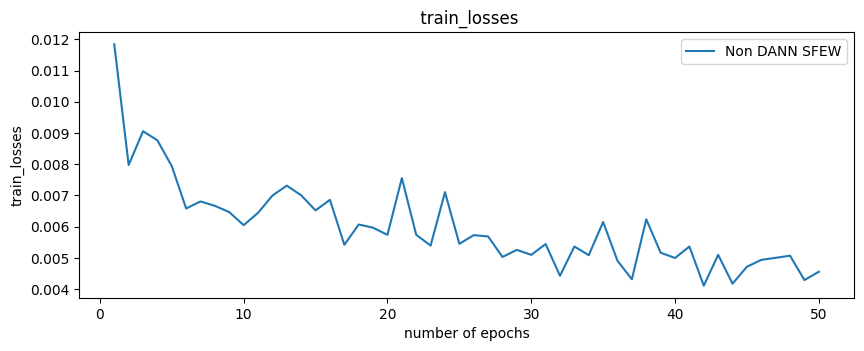

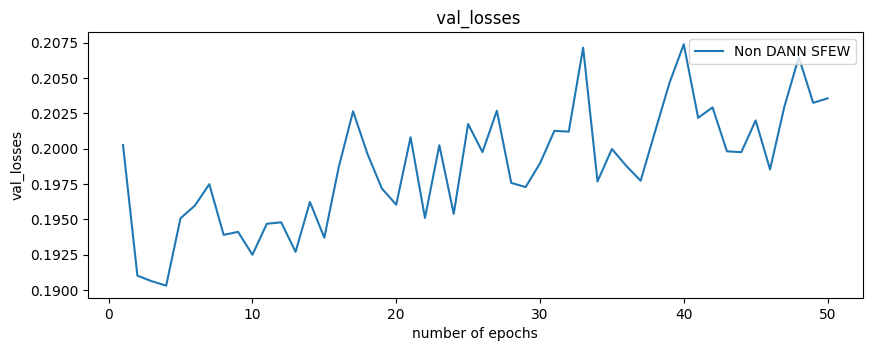

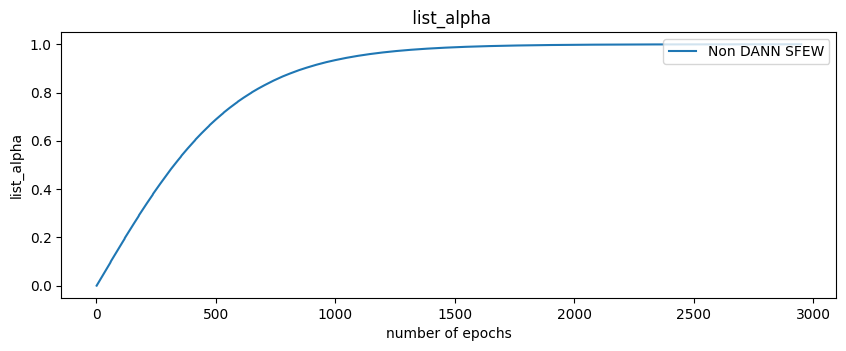

In [33]:
plot_loss_curves(dict_dann_losses,mode='train_losses')
plot_loss_curves(dict_dann_losses,mode='val_losses')
plot_loss_curves(dict_dann_losses,mode='list_alpha')

### Saving DANN Model

In [34]:
model_dann

DANN(
  (feature_extractor): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tr

In [35]:
dataconfig_1 = DataConfig()
MODEL_DIR = dataconfig_1.MODEL_DIR
MODEL_DIR

PosixPath('/content/gdrive/MyDrive/CV_FER/models')

In [36]:

dann_model_name = f'dann_{source_name}_{target_name}_{str(time.strftime("%d_%m"))}.pt' # "dann_sfew_expw_" + str(time.strftime("%d_%m")) + ".pt"
print(dann_model_name)

# from data_config import DataConfig
dataconfig_1 = DataConfig()
MODEL_DIR = dataconfig_1.MODEL_DIR

DANN_MODEL_DIR =  Path(os.path.join(MODEL_DIR, f'dann_{source_name}_{target_name}'))
# try:
#     DANN_SFEW_EXPW_DIR = Path(dataconfig_1.DANN_SFEW_EXPW_DIR)
# except:
#     DANN_SFEW_EXPW_DIR =Path(dataconfig_1.MODEL_DIR,"dann_sfew_expw")


if not DANN_MODEL_DIR.exists():
    # Create the directory
    DANN_MODEL_DIR.mkdir(parents=True, exist_ok=True)
    print(f'Directory {DANN_MODEL_DIR} created successfully.')
else:
    print(f'Directory {DANN_MODEL_DIR} already exists.')


try:
    torch.save(model_dann.state_dict(), Path(DANN_MODEL_DIR,dann_model_name))
    print(f'{dann_model_name} SAVED at {Path(DANN_MODEL_DIR,dann_model_name)}!')
except:
    print(f'Problem in saving {dann_model_name}, NOT SAVED!')


dann_sfew_expw_31_01.pt
Directory /content/gdrive/MyDrive/CV_FER/models/dann_sfew_expw already exists.
dann_sfew_expw_31_01.pt SAVED at /content/gdrive/MyDrive/CV_FER/models/dann_sfew_expw/dann_sfew_expw_31_01.pt!


## DANN EWC : Training, Validating, Saving

In [15]:
# dataconfig_inference = DataConfig()

# # NON DANN
# non_dann_model_sfew_name = 'non_dann_sfew_20_01.pt'
# non_dann_model_inference = DANN(num_classes=7) # skeleton copy
# NON_DANN_SFEW_DIR = dataconfig_inference.NON_DANN_SFEW_DIR # Path(self.MODEL_DIR,"non_dann_sfew")

# try:
#     non_dann_model.load_state_dict(torch.load(Path(NON_DANN_SFEW_DIR, non_dann_model_sfew_name),
#                                                         map_location=torch.device(device)))
#     print(f'{non_dann_model_sfew_name} locked and loaded')
# except:
#     print(f' problem in loading {non_dann_model_sfew_name}')


In [16]:
# model_dann_ewc = non_dann_model # saves training time - check with all


In [17]:
model_dann_ewc

DANN(
  (feature_extractor): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tr

### EWC Code
Regularization Penalty

In [18]:

from torch.autograd import Variable
from torch.autograd import Function
from da_cv_fer.run_config import RunConfig

runconfig = RunConfig()
def variable(t: torch.Tensor, use_cuda=True, **kwargs):
    if torch.cuda.is_available() and use_cuda:
        t = t.cuda()
    return Variable(t, **kwargs)

class EWC(object):
    def __init__(self, model: nn.Module,
                 data_loader: torch.utils.data.DataLoader
                #  dataset: list
                 ,device=device
                 , class_loss_function = runconfig.criterion_class):

        self.model = model
        # print("----------MODEL--------\n",self.model)
        self.dataset = data_loader
        self.device = device
        self.class_loss_function = class_loss_function

        # creating dictionary of params which required grad
        self.params = {n: p for n, p in self.model.named_parameters() if p.requires_grad}

        self._means = {}
        for n, p in deepcopy(self.params).items():
            self._means[n] = variable(p.data)

        # print("--------self._means----------------\n", self._means)

        self._precision_matrices = self._diag_fisher()

    def _diag_fisher(self):
        precision_matrices = {}
        for n, p in deepcopy(self.params).items():
            p.data.zero_()
            precision_matrices[n] = variable(p.data)
        # print("--------PRECISION MATRICES----------------\n", precision_matrices)

        self.model.eval()
        for batch in self.dataset:
            self.model.zero_grad()
            images, labels  = variable(batch[0].to(device)), variable(batch[1].to(device))
            class_ouputs, _ , _ = model(images) # class_output, domain_output, features
            task_loss =  self.class_loss_function(class_ouputs,labels)
            task_loss.backward() # only calculating the gradients, not updating it
            # print("--------task loss----------------\n", task_loss)

            for n, p in self.model.named_parameters():
              # if type(p.grad)
              if isinstance(p.grad, type(None)):
                pass # parameter value would remain as it is
              else:
                # print(n,":", type(p.grad))
                precision_matrices[n].data += p.grad.data ** 2 / len(self.dataset)

        precision_matrices = {n: p for n, p in precision_matrices.items()}
        return precision_matrices

    def penalty(self, model: nn.Module):
        loss = 0
        for n, p in model.named_parameters():
            _loss = self._precision_matrices[n] * (p - self._means[n]) ** 2
            loss += _loss.sum()
        return loss

**DANN EWC Object.**

In [19]:
ewc_object = EWC(deepcopy(model_dann_ewc),
                 data_loader=data_loader['source']['train'],#sfew_train_loader,
                 device=device,
                 class_loss_function=runconfig.criterion_class)

### DANN EWC Execution (training and testing) Function without Learning rate


In [20]:
def execute_dann_ewc(model,
                     device,
                     source_train_loader, source_val_loader,
                     target_train_loader, target_val_loader,
                     optimizer,
                     n_epochs, # total number of epochs (different from individual epoch)
                     class_loss_function = nn.CrossEntropyLoss(),
                     domain_loss_function = nn.BCEWithLogitsLoss(),
                     EWC_LAMBDA = 0.4, # to understand regularlization
                     ):

    train_losses = [] # to capture train losses over training epochs
    val_losses = [] # to capture validation loss over epochs
    epoch_converge = n_epochs
    max_batches = min(len(source_train_loader), len(target_train_loader)) # Trying to check which is having less batches.
    existing_model = deepcopy(model)
    model = deepcopy(model).to(device) # copies params from existing model to another one https://discuss.pytorch.org/t/copying-weights-from-one-net-to-another/1492/2
    # model.apply(weights_init) # TODO: skipping weights update - we can experimentation later on, and see if this helps
    list_alpha =[]
    #TODO: Scheduler
    ewc_object = EWC(deepcopy(model),
                     data_loader=source_train_loader,
                     device=device,
                     class_loss_function=class_loss_function) # instantiating EWC object, we would use this object for understanding penalty


    for epoch_idx in range(n_epochs):
        print(f'epoch = {epoch_idx+1}...in EWC DANN execution function')
        source_iterator = iter(source_train_loader)
        target_iterator = iter(target_train_loader)
        epoch_task_loss = 0
        epoch_domain_loss =  0
        epoch_total_loss = 0
        processed = 0

        for batch_idx in range(max_batches-1):
            p = float(batch_idx + epoch_idx * max_batches) / (n_epochs * max_batches)
            alpha = 2. / (1. + np.exp(-10 * p)) - 1
            list_alpha.append(alpha)
            alpha = torch.tensor(alpha)

            model.train() # everytime ?
            optimizer.zero_grad() # flushing out the accumulated gradients

            #---------------------Source Dataset Training ------------------------#
            source_batch = next(source_iterator)
            source_images, source_labels = source_batch[0].to(device), source_batch[1].to(device) # getting images and labels, on device
            source_class_outputs, source_domain_outputs, _ = model(source_images, alpha=alpha) # forward pass, output = {class, domain, feature}

            # Calculating source class loss, regularlized by EWC
            loss_source_class = class_loss_function(source_class_outputs, source_labels) + EWC_LAMBDA * ewc_object.penalty(model)# calculating class loss

            source_domain_inputs = torch.tensor([1., 0.]*len(source_batch[0])).view(-1,2).to(device) # Source Image == [1., 0.]

            loss_source_domain = domain_loss_function(source_domain_outputs, source_domain_inputs) # calculating domain loss

            processed += len(source_batch[0])

            #---------------------Target Dataset Training ------------------------#
            target_batch = next (target_iterator)
            target_images = target_batch[0].to(device) # getting images, on device. There are no labels for target
            _, target_domain_outputs, _ = model(target_images, alpha=alpha) # forward pass, output = {class, domain, feature}

            target_domain_inputs = torch.tensor([0., 1.]*len(source_batch[0])).view(-1,2).to(device) # Target Image == [0., 1.]

            loss_target_domain = domain_loss_function(target_domain_outputs,target_domain_inputs)  # calculating domain loss


            #---------------------Combining Loss ------------------------#
            total_loss = loss_source_class + loss_source_domain + loss_target_domain
            total_loss.backward() #backpropogation, creating gradients
            optimizer.step() # updating the params

            epoch_task_loss += loss_source_class.item()
            epoch_domain_loss += loss_source_domain.item() + loss_target_domain.item()
            epoch_total_loss += total_loss.item()

            # after 10 batches
            if (batch_idx % 50 == 0):
                print("Epoch [{}/{}] Step [{}/{}]: loss_total={:.4f} / domain_loss_target={:.4f} / domain_loss_source={:.4f} / task_loss={:.4f} / domain_loss={:.4f} / alpha={:.4f}"
              .format(epoch_idx + 1,
                      n_epochs,
                      batch_idx + 1,
                      max_batches,
                      total_loss.item(),
                      loss_target_domain.item()
                      ,loss_source_domain.item()
                      ,loss_source_class.item()
                      ,loss_source_domain.item()+loss_source_class.item(),
                      alpha))
        # After every epoch
        avg_train_task_loss =  float("{:.6f}".format(epoch_task_loss/processed))
        train_losses.append(avg_train_task_loss)

        #TODO: Scheduler

        #Validate Model after every epoch
        correct, avg_val_task_loss = test_model(model= model,
                                                device= device,
                                                data_loader = source_val_loader,
                                                class_loss_function = class_loss_function)
        val_losses.append(avg_val_task_loss)


        #TODO: Early Stopping

    # Testing when the training is over - completed or early stopped
    correct_source, test_loss_source = test_model(model= model,
                            device= device,
                            data_loader = source_val_loader, # source val loader
                            class_loss_function = class_loss_function)

    accuracy_source = correct_source / len(source_val_loader.dataset)

    correct_target, test_loss_target = test_model(model= model,
                            device= device,
                            data_loader = target_val_loader, # target val loader
                            class_loss_function = class_loss_function)

    accuracy_target = correct_target / len(target_val_loader.dataset)


    dict_ewc_dann_losses = {'train_losses' : train_losses,
                        'val_losses': val_losses,
                        'test_loss_source' : test_loss_source,
                        'test_loss_target' : test_loss_target,
                        'epoch_convergence' : 0,
                        'list_alpha' : list_alpha,
                        'test_accuracy_source' : accuracy_source,
                        'test_accuracy_target':accuracy_target  }

    print(f'alpha list \n {list_alpha}')
    return model, dict_ewc_dann_losses





### DANN EWC Execute

In [21]:
runconfig = RunConfig()
lr_ewc_dann = runconfig.inital_lr/5.0 #override
optimizer_ewc_dann = optim.SGD(model_dann.parameters(), lr = lr_ewc_dann, momentum = 0.9)
n_epochs = runconfig.EPOCHS
# n_epochs = 2 # override
try:
    EWC_LAMBDA = runconfig.EWC_LAMBDA
except:
    EWC_LAMBDA = 0.4

print(EWC_LAMBDA)

print(f'------------training started for EWC DANN Model ------------------')

ewc_dann_model , dict_ewc_dann_losses = execute_dann_ewc(model=model_dann,
                                                                                  device=device,
                                                                                  source_train_loader = data_loader['source']['train'], #sfew_train_loader,
                                                                                  source_val_loader = data_loader['source']['val'], #sfew_val_loader,
                                                                                  target_train_loader = data_loader['target']['train'], #expw_train_loader,
                                                                                  target_val_loader = data_loader['target']['val'], #expw_val_loader,
                                                                                  optimizer = optimizer_ewc_dann,
                                                                                  n_epochs = n_epochs,
                                                                                  class_loss_function = runconfig.criterion_class,
                                                                                  domain_loss_function = runconfig.criterion_domain,
                                                                                  EWC_LAMBDA=EWC_LAMBDA, # Hyperparameter about penalty relevance
                                                                                )

0.4
------------training started for EWC DANN Model ------------------
epoch = 1...in EWC DANN execution function
Epoch [1/50] Step [1/60]: loss_total=1.8374 / domain_loss_target=0.6651 / domain_loss_source=0.7801 / task_loss=0.3922 / domain_loss=1.1723 / alpha=0.0000
Epoch [1/50] Step [51/60]: loss_total=1.9537 / domain_loss_target=0.6723 / domain_loss_source=0.7913 / task_loss=0.4900 / domain_loss=1.2813 / alpha=0.0831
Test / Val: Average loss: 0.1967, Accuracy: 110/436 (25.23%)

epoch = 2...in EWC DANN execution function
Epoch [2/50] Step [1/60]: loss_total=1.5713 / domain_loss_target=0.6279 / domain_loss_source=0.7762 / task_loss=0.1671 / domain_loss=0.9434 / alpha=0.0997
Epoch [2/50] Step [51/60]: loss_total=1.5814 / domain_loss_target=0.6346 / domain_loss_source=0.7924 / task_loss=0.1544 / domain_loss=0.9468 / alpha=0.1813
Test / Val: Average loss: 0.1957, Accuracy: 109/436 (25.00%)

epoch = 3...in EWC DANN execution function
Epoch [3/50] Step [1/60]: loss_total=1.4578 / domain_l

### DANN EWC Plotting and Validation

In [22]:
dict_ewc_dann_losses['test_loss_source'], dict_ewc_dann_losses['test_loss_target']

(0.19399064833964777, 0.2041169114049836)

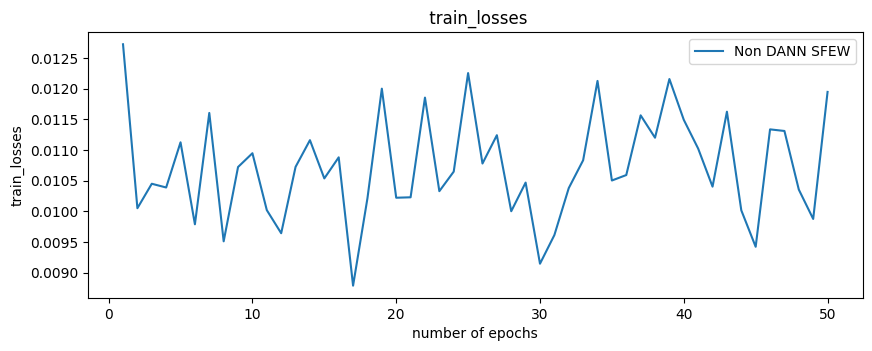

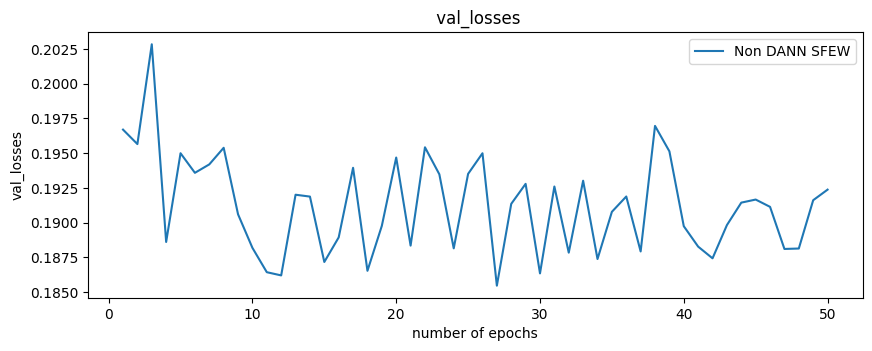

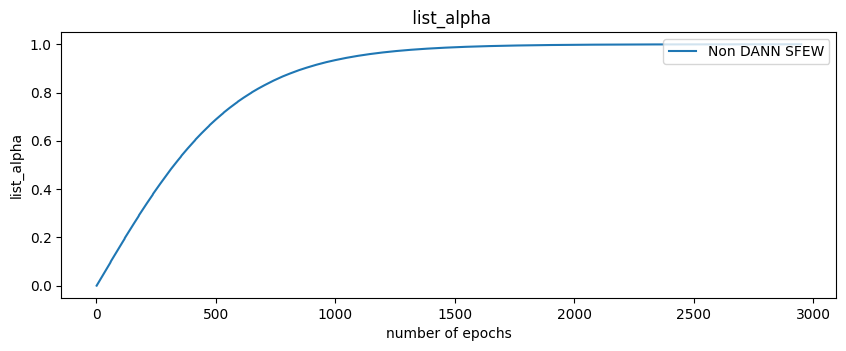

In [25]:
plot_loss_curves(dict_ewc_dann_losses,mode='train_losses')
plot_loss_curves(dict_ewc_dann_losses,mode='val_losses')
plot_loss_curves(dict_ewc_dann_losses,mode='list_alpha')

### Saving DANN EWC Model

In [26]:
# ewc_dann_model_name = 'ewc_dann_sfew_expw_30_01.pt'
ewc_dann_model_name = f'ewc_dann_{source_name}_{target_name}_{str(time.strftime("%d_%m"))}.pt' #"ewc_dann_sfew_expw_" + str(time.strftime("%d_%m")) + ".pt"
print(ewc_dann_model_name)

from da_cv_fer.data_config import DataConfig
dataconfig_2 = DataConfig()
MODEL_DIR = dataconfig_2.MODEL_DIR


EWC_DANN_MODEL_DIR =  Path(os.path.join(MODEL_DIR, f'ewc_dann_{source_name}_{target_name}'))
# try:
#     EWC_DANN_SFEW_EXPW_DIR = Path(dataconfig_2.EWC_DANN_SFEW_EXPW_DIR)
# except:
#     EWC_DANN_SFEW_EXPW_DIR =Path(dataconfig_2.MODEL_DIR,"ewc_dann_sfew_expw")


if not EWC_DANN_MODEL_DIR.exists():
    # Create the directory
    EWC_DANN_MODEL_DIR.mkdir(parents=True, exist_ok=True)
    print(f'Directory {EWC_DANN_MODEL_DIR} created successfully.')
else:
    print(f'Directory {EWC_DANN_MODEL_DIR} already exists.')

try:
    torch.save(ewc_dann_model.state_dict(), Path(EWC_DANN_MODEL_DIR,ewc_dann_model_name))
    print(f'{ewc_dann_model_name} SAVED at {Path(EWC_DANN_MODEL_DIR,ewc_dann_model_name)}!')
except:
    print(f'Problem in saving {ewc_dann_model_name}, NOT SAVED!')


ewc_dann_sfew_expw_31_01.pt
Directory /content/gdrive/MyDrive/CV_FER/models/ewc_dann_sfew_expw already exists.
ewc_dann_sfew_expw_31_01.pt SAVED at /content/gdrive/MyDrive/CV_FER/models/ewc_dann_sfew_expw/ewc_dann_sfew_expw_31_01.pt!
